# Model Fitting Intro

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#generate some random numbers with values between -0.5 and 0.5, which we'll call "noise"
noise = (np.random.rand(21)-0.5)
noise

array([-0.01249163,  0.36800593, -0.11592244, -0.35858791, -0.10724605,
       -0.4283179 , -0.45456385,  0.12130374,  0.31671486, -0.22389526,
       -0.00265057,  0.04186762,  0.05373924, -0.02144189,  0.44588585,
       -0.42802579,  0.48364382,  0.32953441,  0.42483855, -0.30262011,
        0.12412832])

Text(0.5, 1.0, 'tight scatter')

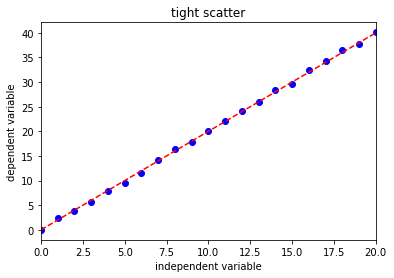

In [3]:
#plot simple relationship y=2x with this noise added
x = np.arange(21)
data=2*x+noise
model=2*x
plt.plot(x,data, 'bo')
plt.plot(x,model,'r--')
plt.xlim(0,20)
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("tight scatter")

In [4]:
#make noisier noise (between -5 and 5)
noise2 = (np.random.rand(21)-0.5)*10
noise2

array([-1.78557087,  4.85028415, -0.34996729, -0.77634956,  0.2293807 ,
       -1.93275219, -1.06346073,  0.86715524,  1.92177553, -2.90876866,
        1.86881287, -3.77364398,  2.43309635,  1.81124329,  3.09137096,
        4.93058661, -2.60565955, -3.66976442, -3.95454594, -0.1517864 ,
        3.42486579])

Text(0.5, 1.0, 'larger scatter')

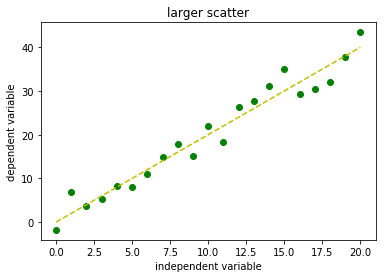

In [5]:
data2 = 2*x+noise2
plt.plot(x,data2, 'go')
plt.plot(x,model, 'y--')
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("larger scatter")

# Use Residuals as metric for quality of fit

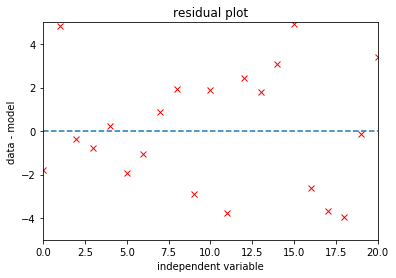

In [60]:
residuals = data2-model
plt.plot(x, residuals, 'rx')
plt.plot([0,20],[0,0],'--')
plt.ylim(-5,5)
plt.xlim(0,20)
plt.xlabel('independent variable')
plt.ylabel('data - model')
plt.title('residual plot')
plt.savefig('residuals.png')

# Use quantitative metric for quality of fit 

In [7]:
#squaring and square rooting gives us only positive distances 
residuals_pos = np.sqrt((residuals)**2)
residuals_pos

array([1.78557087, 4.85028415, 0.34996729, 0.77634956, 0.2293807 ,
       1.93275219, 1.06346073, 0.86715524, 1.92177553, 2.90876866,
       1.86881287, 3.77364398, 2.43309635, 1.81124329, 3.09137096,
       4.93058661, 2.60565955, 3.66976442, 3.95454594, 0.1517864 ,
       3.42486579])

In [8]:
#then add them all up to get a total measure of the difference
total_error = sum(residuals_pos)
total_error

48.40084107448243

this is usually called "least-squares" fitting

Text(0.5, 1.0, 'no fit')

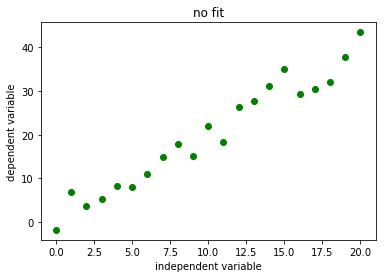

In [9]:
#now, let's assume that I have only the data and no knowledge of the underlying model relationship
plt.plot(x,data2, 'go')
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("no fit")

In [10]:
# I might first want to know something about the correlation value R for these two variables
#there are lots of ways to do this in python. here's one
from scipy.stats.stats import pearsonr
#the output is the correlation coefficient R and the "p value", a measure of significance that we'll talk about later
pearsonr(x,data2)

(0.9758381737484939, 5.1977227462564644e-14)

Text(0.5, 1.0, 'potential fits')

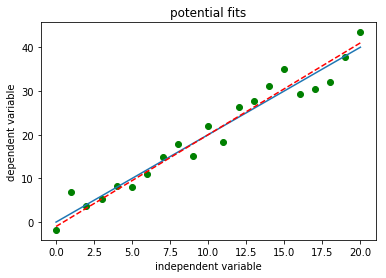

In [11]:
#this sum of squares metric might also allow me to judge the quality of one model relative to another. For example:
model2 = 2.1*x-1
plt.plot(x,data2, 'go')
plt.plot(x,model)
plt.plot(x,model2,'r--')
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("potential fits")

In [12]:
#they both look like reasonable matches to the data, so how do I know which one matches better?

error1 = sum(np.sqrt((model-data2)**2))
error2 = sum(np.sqrt((model2-data2)**2))
print("sum of squares for model 1 \(true\) is ", error1)
print("sum of squares for model 2 is ",error2)

sum of squares for model 1 \(true\) is  48.40084107448243
sum of squares for model 2 is  48.50090648875049


Note that if you execute all these cells multiple times, not infrequently the quality of fit metric for the alternate model will be better than the "true" model.

# Curve Fitting

Of course there are more sophisticated ways to choose a model besides simple trial and error. 

In [47]:
#python has lots of built-in functionalities for this kind of thing. let's look at a few
#to start, let's use scipy's stats module's linregress function to find a best linear fit
from scipy.stats import linregress

In [48]:
lin_model = linregress(x, data2)
print(lin_model)
print(type(lin_model))
lin_model[2]

LinregressResult(slope=1.9933909196238246, intercept=0.1830575603061817, rvalue=0.9758381737484939, pvalue=5.197722746256455e-14, stderr=0.10239492596177398)
<class 'scipy.stats._stats_mstats_common.LinregressResult'>


0.9758381737484939

In [49]:
#now let's try a more general model fitting function
import scipy.optimize as optimization

In [50]:
#to use it, you have to define a functional form for the fit line BUT NOT THE SPECIFIC VALUES

#for linear (straight line) fits this could take two forms

#line without an intercept (intercept zero)
def slopefunc(x,sl):
    return sl*x

#line with an intercept
def slopeintfunc(x,sl,incpt):
    return sl*x+incpt

#we could continue this to functions of arbitraty order
#for example, quadratic:

def quadfunc(x,a,b,c):
    return a+b*x+c*x*x

def mysin(x):
    return np.sin(x)

In [51]:
#then use curve_fit
fit = optimization.curve_fit(slopeintfunc,x,data2)
#fit = optimization.curve_fit(mysin,x,data2)

#the zeroth element then contains the optimal parameters for the functional parameters (in this case sl, incpt)
#the output of the function is a python data type called a tuple, which we'll learn about later
fit[0]

array([1.99339092, 0.18305756])

In [52]:
#and the next element contains what's called the covariance matrix, which can also be quite useful
fit[1]

array([[ 0.01048473, -0.10484735],
       [-0.10484735,  1.43291308]])

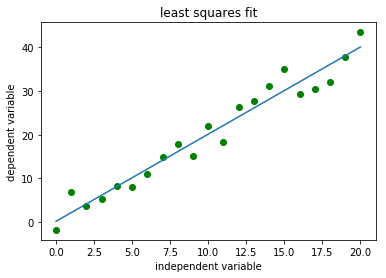

In [57]:
#let's plot it over the data now
plt.plot(x,data2, 'go')
plt.plot(x, slopeintfunc(x,fit[0][0],fit[0][1]))
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("least squares fit")
plt.savefig('leastsquaresfit.png')

# Overfitting

since we can define functions to arbitrary dimensions, this can get a bit out of control

In [54]:
def tenparamfunc(x,a,b,c,d,e,f,g,h,i,j):
    return a+b*x+c*x**2+d*x**3+e*x**4+f*x**5+g*x**6+h*x**7+i*x**8+j*x**9

In [55]:
fit2 = optimization.curve_fit(tenparamfunc,x,data2)
fit2[0]

array([-1.57473624e+00,  1.48909019e+01, -1.00603776e+01,  2.76335140e+00,
       -2.84874162e-01, -4.70206317e-03,  3.46780554e-03, -2.95310725e-04,
        1.06185145e-05, -1.43525055e-07])

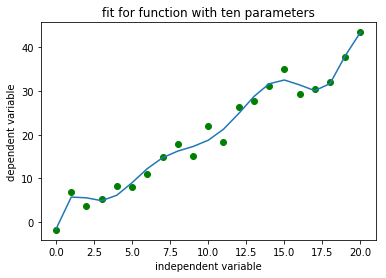

In [56]:
plt.plot(x,data2, 'go')
c = fit2[0]
plt.plot(x, tenparamfunc(x,c[0],c[1],c[2],c[3],c[4],c[5],c[6],c[7],c[8],c[9]))
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("fit for function with ten parameters")
plt.savefig('overfitting.png')

### General rule of thumb

Number of parameters in your model should be <<< number of data points

# Fitting with error bars

Often we know enough about how our measurements are taken that we can assign "error bars" or "uncertainties" to our measurements

In [23]:
# equal errors (homoschedastic)
errors_uniform = np.ones(21)

#errors that vary (heteroschedastic)
errors_poisson = np.sqrt(data2)

/Users/kfollette/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


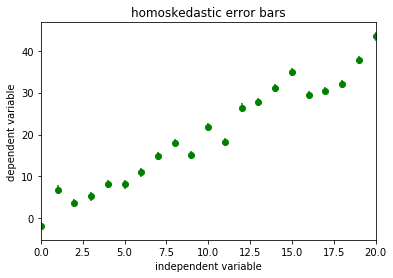

In [24]:
#visualize this
plt.errorbar(x,data2,yerr=errors_uniform, fmt='go')
plt.xlim(0,20)
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("homoskedastic error bars")
plt.savefig('homoskedastic_errors.png')

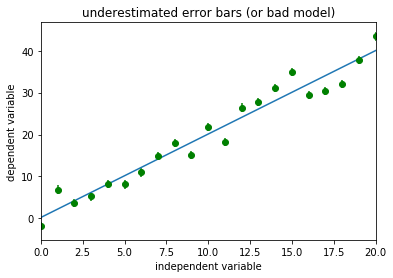

In [25]:
plt.errorbar(x,data2,yerr=errors_uniform, fmt='go')
plt.xlim(0,20)
plt.plot(x, slopeintfunc(x,fit[0][0],fit[0][1]))
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("underestimated error bars (or bad model)")
plt.savefig('underestimated_errors.png')

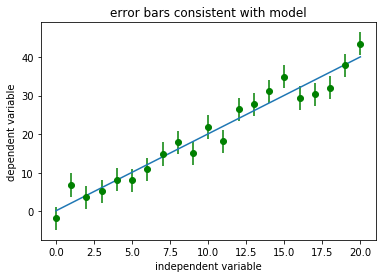

In [26]:
plt.errorbar(x,data2,yerr=errors_uniform*3, fmt='go')
plt.xlim(-1,21)
plt.plot(x, slopeintfunc(x,fit[0][0],fit[0][1]))
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("error bars consistent with model")
plt.savefig('good_errors.png')

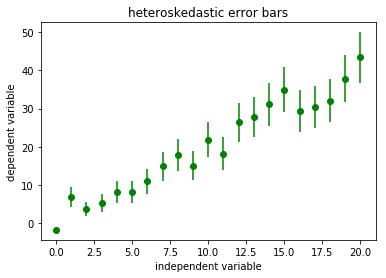

In [27]:
plt.errorbar(x,data2,yerr=errors_poisson, fmt='go')
plt.xlim(-1,21)
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("heteroskedastic error bars")
plt.savefig('heteroskedastic_errors.png')

# Weighted Least Squares

If we want to take the uncertainty in each of our data points into consideration in calculating goodness of fit, we can extend this to assigning "weights" to each data point. 

Since larger error bars indicate greater uncertainty, these data points should be assigned less weight than other data points with smaller error bars. 

A weight is just like a coefficient in front of the (data-model)$^2$ calculation typical to least squares. More formally:

$$ Q = \sum_{i=1}^nw_i[y_i-f(x_i,\beta)]^2$$

Where $x_i$ is the independent variable, $y_i$ are the observed values, $f(x_i,\beta)$ is the model with some set of parameters $\beta$ and $w_i$ are the weights for each datapoint

A common weight is the reciprocal of the error value squared, or $\frac{1}{\sigma^2}$. Sigma here is the value of the error bar and is not to be confused with a standard deviation, though standard deviation values are often assigned as errors. 

Let's do this for our example of heteroschedastic error bars above

In [28]:
lsq_weighted=sum(1/errors_poisson**2*(data2-model)**2)
lsq_weighted

nan

Oops what happened? Well, the model value at x=0 is 0 in this case, and the errors are too, so our 1/errors_poissson statement becomes problematic because we can't divide by zero. 

We can fix this by removing the datapoint from consideration (indeed it's rare that we measure something to be zero anyway, so it was a bit contrived to begin with). 

In [38]:
x3=np.arange(20)+1
model3=2*x3
noise3 = (np.random.rand(20)-0.5)*10
data3= 2*x3+noise3 
errors_poisson3 = np.sqrt(data3)

In [39]:
lsq_weighted=sum(1/errors_poisson3**2*(data3-model3)**2)
lsq_weighted

19.363455930863275

Similarly, we can build in the uncertainties/weights when we do the least squares fit to the data. As before, the function will minimize the least squares sum to find the best fit, but this time the version with the weights. 

In [40]:
fit_weighted = optimization.curve_fit(slopeintfunc,x3,data3, sigma=errors_poisson3)
fit_unweighted = optimization.curve_fit(slopeintfunc,x3,data3)

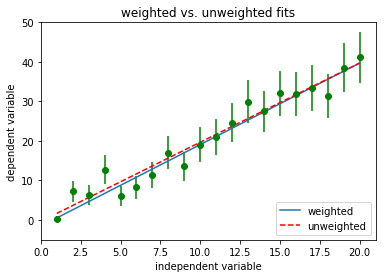

In [42]:
plt.errorbar(x3,data3,yerr=errors_poisson3, fmt='go')
plt.xlim(0,21)
plt.ylim(-5,50)
plt.plot(x3, slopeintfunc(x3,fit_weighted[0][0],fit_weighted[0][1]), label='weighted')
plt.plot(x3, slopeintfunc(x3,fit_unweighted[0][0],fit_unweighted[0][1]), 'r--', label='unweighted')
plt.legend(loc='lower right',)
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
plt.title("weighted vs. unweighted fits")
plt.savefig('weighted_v_not.png')